<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISL-Chapter-8---Tree-based-models" data-toc-modified-id="ISL-Chapter-8---Tree-based-models-1">ISL Chapter 8 - Tree based models</a></span></li><li><span><a href="#Basics-of-decision-trees---Hitters-data" data-toc-modified-id="Basics-of-decision-trees---Hitters-data-2">Basics of decision trees - Hitters data</a></span><ul class="toc-item"><li><span><a href="#Preamble:-Exploring-and-transforming-the-Hitters-data-set" data-toc-modified-id="Preamble:-Exploring-and-transforming-the-Hitters-data-set-2.1">Preamble: Exploring and transforming the Hitters data set</a></span></li></ul></li><li><span><a href="#Train-simple-regression-tree" data-toc-modified-id="Train-simple-regression-tree-3">Train simple regression tree</a></span><ul class="toc-item"><li><span><a href="#Figure-8.1-A-simple-regression-tree-for-the-Hitters-data" data-toc-modified-id="Figure-8.1-A-simple-regression-tree-for-the-Hitters-data-3.1">Figure 8.1 A simple regression tree for the Hitters data</a></span></li><li><span><a href="#Figure-8.2-The-three-region-partition-boundaries-for-the-Hitters-data-set" data-toc-modified-id="Figure-8.2-The-three-region-partition-boundaries-for-the-Hitters-data-set-3.2">Figure 8.2 The three-region partition boundaries for the Hitters data set</a></span></li><li><span><a href="#Predictions-in-the-original-space" data-toc-modified-id="Predictions-in-the-original-space-3.3">Predictions in the original space</a></span></li></ul></li><li><span><a href="#An-overfit-tree" data-toc-modified-id="An-overfit-tree-4">An overfit tree</a></span></li><li><span><a href="#Reducing-overfitting" data-toc-modified-id="Reducing-overfitting-5">Reducing overfitting</a></span><ul class="toc-item"><li><span><a href="#Early-stopping" data-toc-modified-id="Early-stopping-5.1">Early stopping</a></span></li><li><span><a href="#Limiting-the-complexity-via-the-number-of-leaves" data-toc-modified-id="Limiting-the-complexity-via-the-number-of-leaves-5.2">Limiting the complexity via the number of leaves</a></span></li></ul></li></ul></div>

# ISL Chapter 8 - Tree based models

This notebook explores chapter 8 of the book "Introduction to Statistical Learning" and aims to reproduce several of the key figures and discussion topics. 

Of interest is the use of the graphviz library to help visualize the resulting trees and GridSearch from the Sklearn library to plot the validation curves

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import tree
import graphviz 

# Basics of decision trees - Hitters data 

We use the Hitters data set to predict a baseball player’s Salary based on Years (the number of years that he has played in the major leagues) and Hits (the number of hits that he made in the previous year). 

We first remove observations that are missing Salary values, and log-transform Salary so that its distribution has more of a typical bell-shape. (Recall that Salary is measured in thousands of dollars.)

In [2]:
hitters = pd.read_csv('/Users/User/Desktop/Data/Datasets/ISLR_data/Hitters.csv')
hitters.dropna(axis=0, how='any', subset=['Salary'], inplace=True)
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


## Preamble: Exploring and transforming the Hitters data set 

<function matplotlib.pyplot.show>

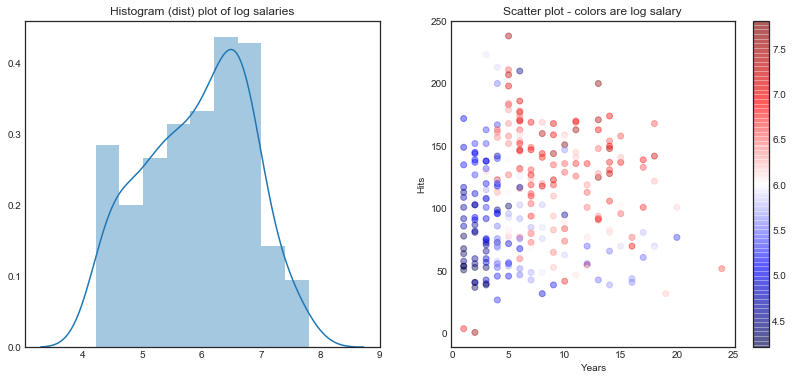

In [3]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func = np.log, inverse_func= np.exp)
y = transformer.transform(hitters.Salary.values.reshape(-1,1))
X = hitters[['Years','Hits']]

fig = plt.figure(figsize = (14,6))
ax = plt.subplot(121)
ax = sns.distplot(y)
ax.set_title('Histogram (dist) plot of log salaries')

ax = plt.subplot(122)
ax.set_xlabel('Years')
ax.set_ylabel('Hits')
ax.set_title('Scatter plot - colors are log salary')

ax2 = ax.scatter(hitters.Years, hitters.Hits, alpha = .4, c = y.flatten(), cmap = 'seismic')
plt.colorbar(ax2)

plt.show

# Train simple regression tree 

In [4]:
from sklearn.tree import DecisionTreeRegressor
simple_tree = DecisionTreeRegressor(random_state = 0, max_depth = 2, max_leaf_nodes=3)
simple_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

## Figure 8.1 A simple regression tree for the Hitters data

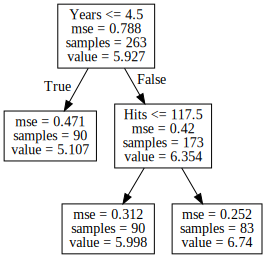

In [5]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(simple_tree, out_file=None, feature_names = ['Years','Hits'], class_names = ['Salary'])  
graph = graphviz.Source(dot_data)  
graph 

## Figure 8.2 The three-region partition boundaries for the Hitters data set

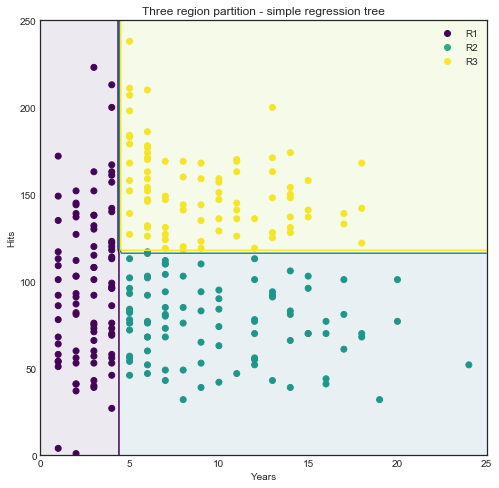

In [11]:
#Scatter plot
log_preds = np.round(simple_tree.predict(X),2).flatten()
color_dict = {'R1': '#440154FF', 'R2': '#29AF7FFF', 'R3': '#FDE725FF'}
plt.figure(figsize = (8,8))
plt.scatter(X.Years, X.Hits, c = log_preds, cmap = 'viridis')

#Plot decision boundary
N = 100
X1 = np.linspace(0, 25, N)
X2 = np.linspace(0, 250, N)
X1, X2 = np.meshgrid(X1, X2)
zz = np.array(  [simple_tree.predict( np.array([xx,yy]).reshape(1,-1)) 
                 for xx, yy in zip(np.ravel(X1), np.ravel(X2)) ] )
Z = zz.reshape(X1.shape)
plt.contourf( X1, X2, Z, 3, alpha = .1, cmap = 'viridis')
plt.contour( X1, X2, Z, 3, alpha = 1, cmap = 'viridis')

# Legend
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title('Three region partition - simple regression tree')
plt.show()

## Predictions in the original space 

In [12]:
preds  = transformer.inverse_transform(log_preds.reshape(1,-1)) * 1000

# An overfit tree 

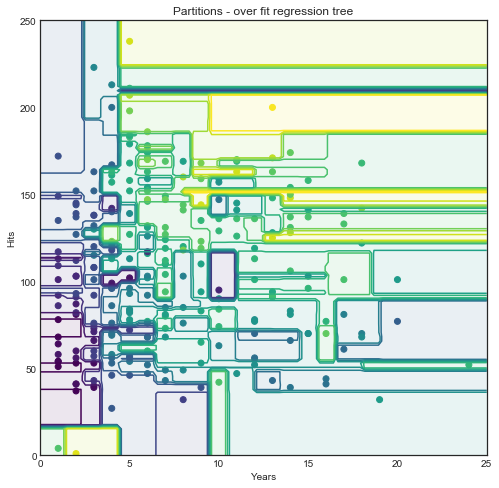

In [13]:
#Fitting the tree
max_d = 15
overfit_tree = DecisionTreeRegressor(random_state = 0, max_depth = max_d)
overfit_tree.fit(X, y)

#Scatter plot
log_preds = np.round(overfit_tree.predict(X),2).flatten()
plt.figure(figsize = (8,8))
plt.scatter(X.Years, X.Hits, c = log_preds, cmap = 'viridis')

#Plot decision boundary
N = 100
X1 = np.linspace(0, 25, N)
X2 = np.linspace(0, 250, N)
X1, X2 = np.meshgrid(X1, X2)
zz = np.array(  [overfit_tree.predict( np.array([xx,yy]).reshape(1,-1)) 
                 for xx, yy in zip(np.ravel(X1), np.ravel(X2)) ] )
Z = zz.reshape(X1.shape)
plt.contourf( X1, X2, Z, max_d, alpha = .1, cmap = 'viridis')
plt.contour( X1, X2, Z, max_d, alpha = 1, cmap = 'viridis')

# Legend
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title('Partitions - over fit regression tree')
plt.show()

# Reducing overfitting

Decision trees are likely to overfit as the depth increases due to the number of \qq{data splits} which reduce the number of data points per feature and thus bring about the curse of dimensionality. To avoid such overfitting there are globally two main approaches: 

1) early stopping
2) pruning


## Early stopping

The idea is to stop learning before the tree becomes too complex. There are three main methods:


- Limit the depth of the tree. For example by selecting the complexity with the lowest validation error 
- Use an error metric to limit the depth. Do not continue if metric improvement is less than a tolerance level. e.g. classification error
- Stop if the number of data points contained in a node is too small. In practice this constraint should always be complemented


### Limiting the depth of the tree by looking at the validation curve
i.e. finding the max depth for which the test MSE is smallest

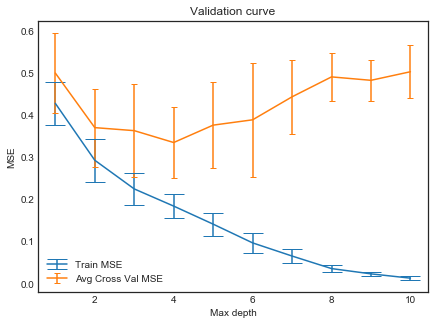

(<matplotlib.legend.Legend at 0x1a203a7198>, None)

In [14]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Split train + validation and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Creating pipeline
pipe = Pipeline([('functiontransformer',
  FunctionTransformer(func=np.log, inverse_func=np.exp)),
 ('decisiontreeregressor',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'))])

#Setup of parameters and gridsearch
depths = np.arange(1,11)
param = {'decisiontreeregressor__max_depth': depths}
grid_search = GridSearchCV(estimator = pipe, param_grid = param ,cv = 3, scoring = 'neg_mean_squared_error', return_train_score=True )

#Grid search
grid_search.fit(X_train,y_train)

#Plot
plt.figure(figsize = (7,5))
plt.errorbar(depths,- grid_search.cv_results_['mean_train_score'], yerr=grid_search.cv_results_['std_train_score'], capsize=10,label = 'Train MSE')

plt.errorbar(depths,- grid_search.cv_results_['mean_test_score'], yerr=grid_search.cv_results_['std_test_score'], capsize=3, label = 'Avg Cross Val MSE')
plt.xlabel('Max depth'), plt.ylabel('MSE'), plt.title('Validation curve')
plt.legend(), plt.show()

### Retrain the model on all train data and check MSE on test data 

In [15]:
pipe.set_params(decisiontreeregressor__max_depth = 4).fit(X_train, y_train)
mean_squared_error(y_test,pipe.predict(X_test))


0.31299715081179397

## Limiting the complexity via the number of leaves
As depth is not the best measure of complexity as the same node can have many different splits

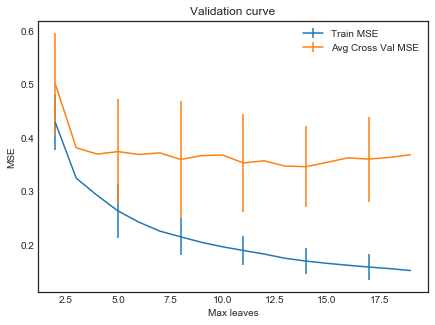

(<matplotlib.legend.Legend at 0x1a20400be0>, None)

In [16]:
#Setup of parameters and gridsearch
leaves = np.arange(2,20)
param = {'decisiontreeregressor__max_leaf_nodes': leaves}
grid_search = GridSearchCV(estimator = pipe, param_grid = param ,cv = 3, scoring = 'neg_mean_squared_error', return_train_score=True )

#Grid search
grid_search.fit(X_train,y_train)

#Plot
plt.figure(figsize = (7,5))
plt.errorbar(leaves,- grid_search.cv_results_['mean_train_score'],yerr =grid_search.cv_results_['std_train_score'],  label = 'Train MSE', errorevery = 3)
plt.errorbar(leaves,- grid_search.cv_results_['mean_test_score'], yerr = grid_search.cv_results_['std_test_score'],label = 'Avg Cross Val MSE', errorevery = 3)
plt.xlabel('Max leaves'), plt.ylabel('MSE'), plt.title('Validation curve')
plt.legend(), plt.show()